In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

In [3]:
wikitext2 = np.array([16432.74609375, 22.7473, 12.9361, 5.472])
c4 = [2265.09, 26.126, 17.332, 7.263]
methods = ['GPTQ', 'QuIP', 'FrameQuant', 'FP16']


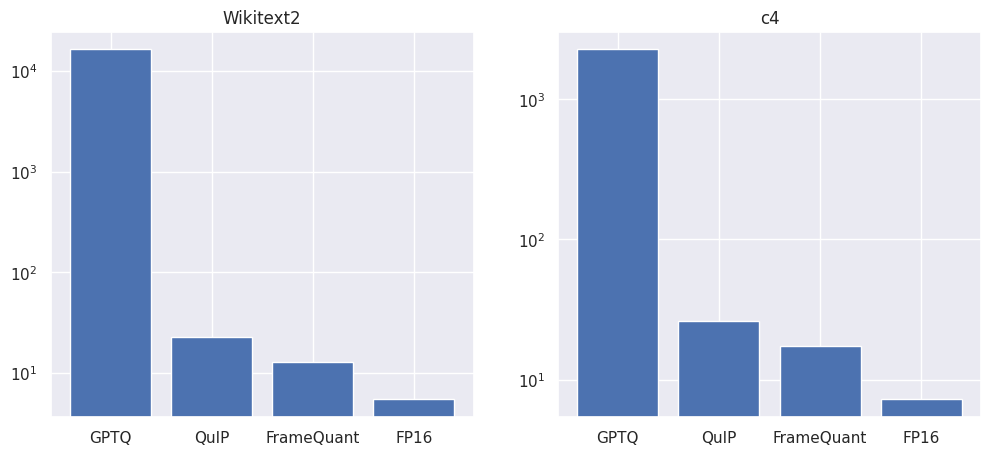

In [4]:
fig, ax = plt.subplots(1,2,squeeze=False, figsize=(12,5))
ax[0,0].bar(methods,wikitext2)
ax[0,0].set_yscale('log')
ax[0,0].set_title('Wikitext2')

ax[0,1].bar(methods,c4)
ax[0,1].set_yscale('log')
ax[0,1].set_title('c4')

plt.show()

In [5]:
OPT_sizes = [125e6,	350e6,	1.3e9,	2.7e9,	6.7e9]
OPT_sizes = [i / 1e9 for i in OPT_sizes]
wikitext2 = {
    'full precision'    : [27.65471649, 22.00370407, 14.62331581, 12.4717416, 10.86060810],
    'GPTQ'			    : [5718.438965, 14780.43848, 8900.991211, 9173.28906, 3090.293213], 
    'QuIP'			    : [913.0303345, 1028.640381, 37.59546661, 22.8658733, 15.67397976], 
    'FrameQuant 1x'		: [345.7648621, 247.2104797, 30.54358482, 20.6702823, 15.72402287], 
    'FrameQuant 1.1x'	: [131.2833405, 59.12369919, 22.68571854, 15.8629446, 13.53851509], 
    'FrameQuant 1.2x'	: [91.68762207, 50.36276627, 19.85887718, 15.5083456, 13.12802124]
}

PTB = {
    'full precision'    : [38.98712158, 31.0729045, 20.29107666, 17.97092056, 15.77187156],
    'GPTQ'			    : [4203.123047, 13366.3916, 8169.348145, 7912.742188, 3403.510498], 
    'QuIP'			    : [1080.798218, 1773.66101, 53.14532089, 31.61868286, 23.26093292], 
    'FrameQuant 1x'		: [581.1602173, 266.140899, 41.8896904 , 30.57845497, 22.49379539], 
    'FrameQuant 1.1x'	: [206.995285 , 85.3328018, 32.97537613, 23.76114464, 19.94165421], 
    'FrameQuant 1.2x'	: [119.7598648, 68.6181564, 28.46438217, 22.66833496, 19.20162392]

}

C4 = {
    'full precision'    : [26.56368064, 22.5887641, 16.07154083, 14.34197902, 12.71276],
    'GPTQ'			    : [2203.897705, 5325.65918, 4139.913574, 4058.415771, 528.4151], 
    'QuIP'			    : [543.635437 , 432.565033, 28.91544914, 21.49104881, 16.92436],
    'FrameQuant 1x'		: [226.1511536, 95.3829116, 27.90516281, 20.7426548 , 17.28221], 
    'FrameQuant 1.1x'	: [91.29110718, 47.6228065, 22.39648247, 17.75164413, 15.33896], 
    'FrameQuant 1.2x'	: [77.26701355, 41.7419357, 21.05994415, 17.23905563, 14.86173]
}

ls = {
	'full precision'    : {'color': '#0000ff', 'marker': 'o', 'ls': 'solid', 'lw': 2, 'ms': 12}, 
	'GPTQ'              : {'color': '#9198f6', 'marker': '^', 'ls': 'dotted', 'lw': 2, 'ms': 12}, 
	'QuIP'              : {'color': '#b5d0ee', 'marker': 's', 'ls': 'dashed', 'lw': 2, 'ms': 12},  
	'FrameQuant 1x'     : {'color': '#ffbcaf', 'marker': 'X', 'ls': (0, (3, 5, 1, 5)), 'lw': 2, 'ms': 12},  
	'FrameQuant 1.1x'   : {'color': '#93003a', 'marker': 'D', 'ls': (0, (1, 1)), 'lw': 2, 'ms': 12},
	'FrameQuant 1.2x'   : {'color': '#695cfc', 'marker': 'h', 'ls': (0, (3, 1, 1, 1, 1, 1)), 'lw': 2, 'ms': 12},

}

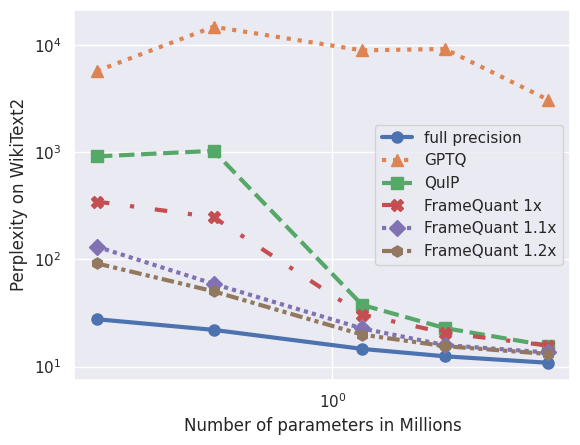

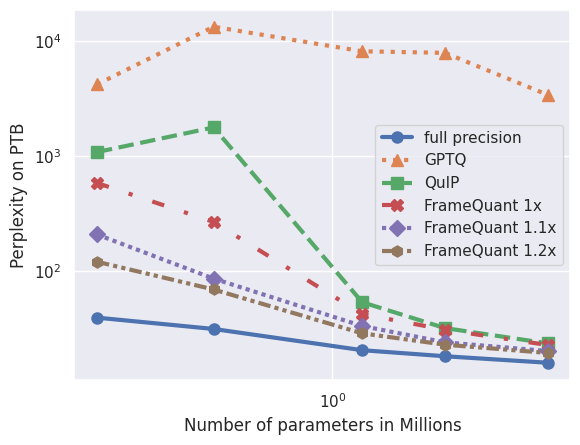

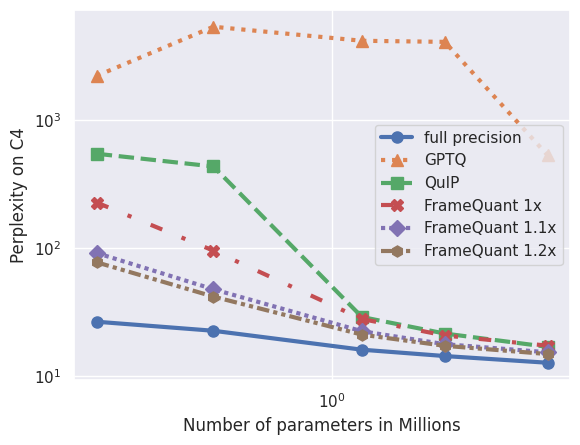

In [6]:
i,j=0,0
for k,v in wikitext2.items():
    plt.loglog(OPT_sizes, wikitext2[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(wikitext2.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on WikiText2')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

i,j=0,0
for k,v in PTB.items():
    plt.loglog(OPT_sizes, PTB[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(PTB.keys()))
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on PTB')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

i,j=0,0
for k,v in C4.items():
    plt.loglog(OPT_sizes, C4[k],marker=ls[k]['marker'], linestyle=ls[k]['ls'], linewidth=3, markersize=8)
plt.legend(list(C4.keys()), loc='center right')
plt.xlabel('Number of parameters in Millions')
plt.ylabel('Perplexity on C4')
ax = plt.gca()
# ax.set_ylim([-2, 90])
plt.savefig('vit_val_accs.pdf', bbox_inches='tight')
plt.show()

In [3]:
methods = ['GPTQ', 'QuIP', 'FrameQuant 1x', 'FrameQuant 1.1x', 'FrameQuant 1.2x', 'FrameQuant 1.3x', 'FrameQuant 1.4x']
llama_wk2= [16432.74609, 26.02627563, 14.85403442, 8.48695755 , 8.015554428, 7.104146004, 6.922535419]
llama_ptb = [None, 917.649047, 240.735626, 85.1113662, 76.7359085, 49.3790817, 49.598423]
llama_c4 = [2265.095703, 26.61297035, 19.62111664, 11.2398777 , 10.59000874, 9.520982742, 9.219749451]
# llama2_full_pres = {'wikitext2': 3.3192, 'PTB': 20.7589, 'C4': 5.70925}
llama2_full_pres = {'wikitext2': 5.472, 'PTB': 20.7589, 'C4': 7.26}

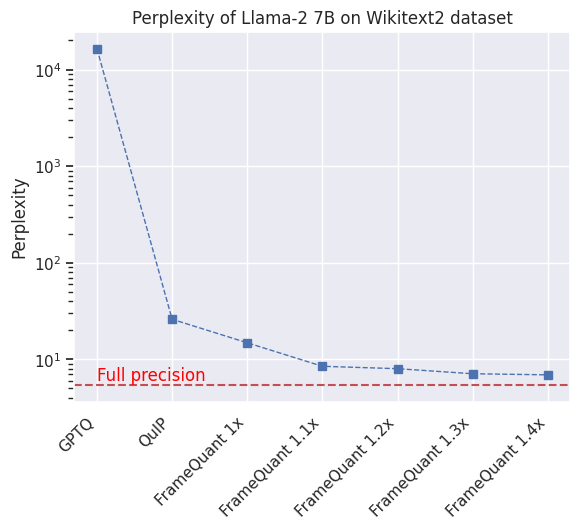

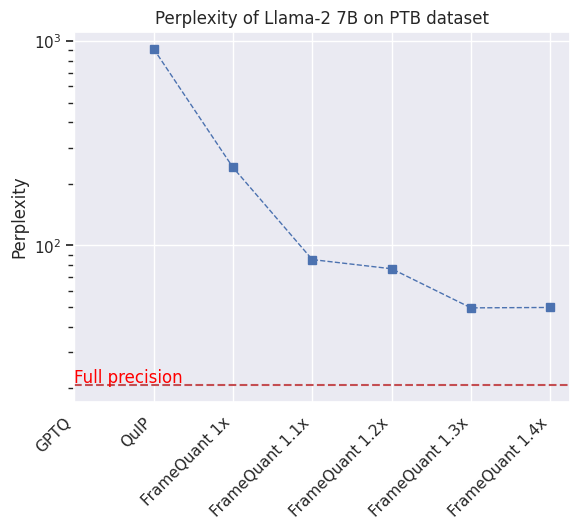

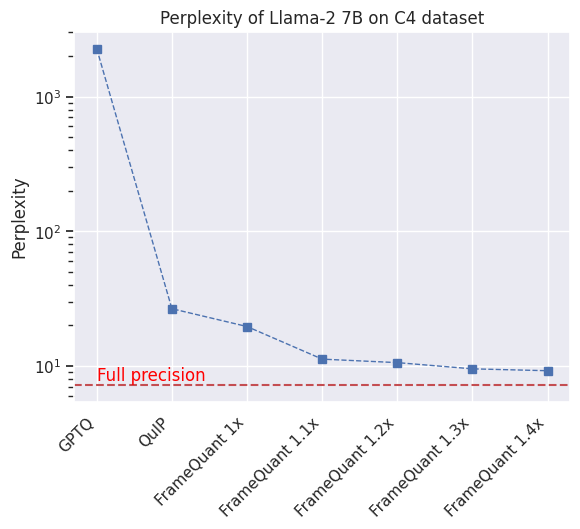

In [5]:
plt.plot(range(len(methods)), llama_wk2, marker='s', linestyle='dashed', linewidth=1)
plt.axhline(y=llama2_full_pres['wikitext2'], color='r', linestyle='--', label='Horizontal Line at y=3')
plt.text(0, llama2_full_pres['wikitext2'] + 0.5, 'Full precision', fontsize=12, color='red')
plt.yscale('log')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
plt.ylabel('Perplexity')
plt.title('Perplexity of Llama-2 7B on Wikitext2 dataset')
plt.tick_params(axis='y', which='both', left=True)


plt.show()

plt.plot(range(len(methods)), llama_ptb, marker='s', linestyle='dashed', linewidth=1)
plt.axhline(y=llama2_full_pres['PTB'], color='r', linestyle='--', label='Horizontal Line at y=3')
plt.text(0, llama2_full_pres['PTB'] + 0.5, 'Full precision', fontsize=12, color='red')
plt.yscale('log')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
plt.ylabel('Perplexity')
plt.title('Perplexity of Llama-2 7B on PTB dataset')
plt.tick_params(axis='y', which='both', left=True)

plt.show()

plt.plot(range(len(methods)), llama_c4, marker='s', linestyle='dashed', linewidth=1)
plt.axhline(y=llama2_full_pres['C4'], color='r', linestyle='--', label='Horizontal Line at y=3')
plt.text(0, llama2_full_pres['C4'] + 0.5, 'Full precision', fontsize=12, color='red')
plt.yscale('log')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
plt.ylabel('Perplexity')
plt.title('Perplexity of Llama-2 7B on C4 dataset')
plt.tick_params(axis='y', which='both', left=True)

plt.show()